In [1]:
import geopandas as gpd
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file("https://raw.githubusercontent.com/wmgeolab/geoBoundaries/a1c1bd60e76864bc4cce64b59f32fb182b64562a/releaseData/gbOpen/ROU/ADM1/geoBoundaries-ROU-ADM1.geojson")
gdf.head()

,shapeName,Level,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,ALBA,ADM1,RO-AB,ROU-ADM1-36066543B14713050,ROU,ADM1,"POLYGON ((22.81197 46.56901, 22.81174 46.56895..."
1,ARAD,ADM1,RO-AR,ROU-ADM1-36066543B68809662,ROU,ADM1,"POLYGON ((22.67658 46.40583, 22.67633 46.40574..."
2,ARGES,ADM1,RO-AG,ROU-ADM1-36066543B61071366,ROU,ADM1,"POLYGON ((25.32124 45.38138, 25.32107 45.38143..."
3,BACAU,ADM1,RO-BC,ROU-ADM1-36066543B33316923,ROU,ADM1,"POLYGON ((27.20625 46.76987, 27.20598 46.76973..."
4,BIHOR,ADM1,RO-BH,ROU-ADM1-36066543B91671333,ROU,ADM1,"POLYGON ((22.81197 46.56901, 22.81243 46.56916..."


In [3]:
year = 2009
country = "Romania"
location_level = "county_name"

colors = json.load(open("consts.json", encoding="utf-8"))

In [4]:
df = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gz", compression="gzip")
df = df.dropna()
df["county_name"] = df["county_name"].str.upper()
df["county_name"] = df["county_name"].replace({"MUNICIPIUL BUCURESTI": "BUCURESTI"})
df.head()

,county_name,candidate,value
0,ALBA,Corneliu Vadim Tudor,0.030255
1,ALBA,Crin Antonescu,0.101979
2,ALBA,Hunor Kelemen,0.090850
3,ALBA,Mircea Geoană,0.091674
4,ALBA,Sorin Oprescu,0.013738


In [17]:
df_fround = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz", compression="gzip")
df_fround.columns = [x.lower() for x in df_fround.columns]

df_runoff = pd.read_csv(f"data_output/{country}/{year}_runoff.csv.gz", compression="gzip")
df_runoff.columns = [x.lower() for x in df_runoff.columns]

candidate_a, candidate_b = df_runoff.candidate.unique()
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")

df_fround = pd.merge(df_fround, df_location, on="polling_id")
df_runoff = pd.merge(df_runoff, df_location, on="polling_id")

df_fround["county_name"] = df_fround["county_name"].str.upper()
df_fround["county_name"] = df_fround["county_name"].replace({"MUNICIPIUL BUCURESTI": "BUCURESTI"})
df_runoff["county_name"] = df_runoff["county_name"].str.upper()
df_runoff["county_name"] = df_runoff["county_name"].replace({"MUNICIPIUL BUCURESTI": "BUCURESTI"})

In [ ]:
set(gdf.shapeName.unique()) - set(df.county_name.unique())

In [ ]:
# pd.merge(df, gdf, left_on="county_name", right_on="shapeName", how="outer")

In [ ]:
df.candidate.unique()

(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

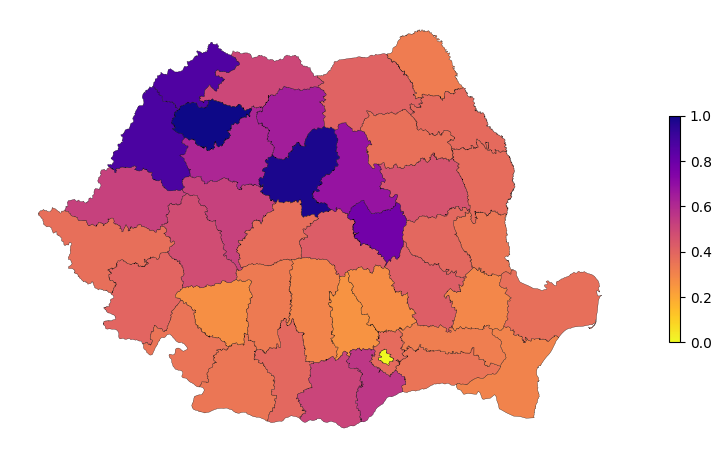

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df.groupby(["county_name"]).agg({"value": "mean"}).reset_index()
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

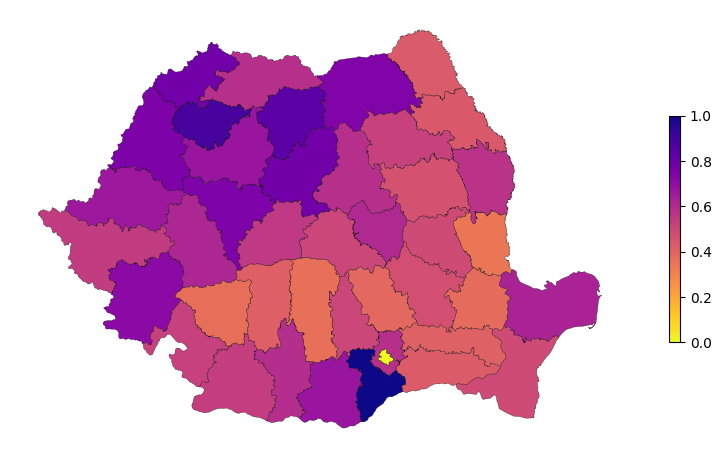

In [9]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df[df["candidate"] == "Traian Băsescu"]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="value", 
    edgecolor="black",
    cmap="plasma_r",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
        shrink=0.3
    )
)

plt.axis("off")

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

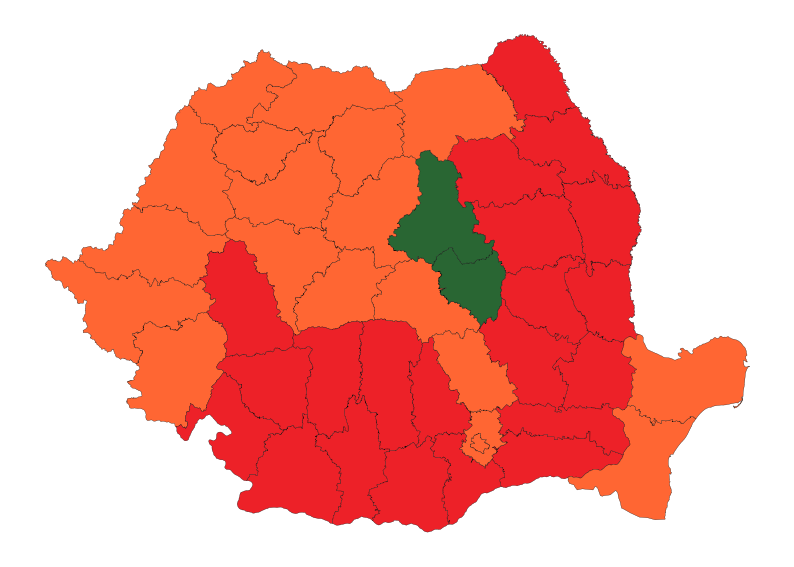

In [18]:
# df_fround["rank"] = df_fround.groupby([location_level, "candidate"]).agg({"value": "sum"}).groupby(level=0)["value"].rank(ascending=False).astype(int)
#df_fround.groupby(location_level)["value"].rank(ascending=False).astype(int)

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
dd = df_fround.groupby([location_level, "candidate"]).agg({"value": "sum"})
dd["rank"] = dd.groupby(level=0)["value"].rank(ascending=False).astype(int)
dd = dd.reset_index()

data_tmp = dd[dd["rank"] == 1]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")
data_tmp["color"] = data_tmp["candidate"].replace(colors)

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="candidate",
    color=data_tmp["color"],
    edgecolor="black",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
#         shrink=0.3
    )
)

plt.axis("off")

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

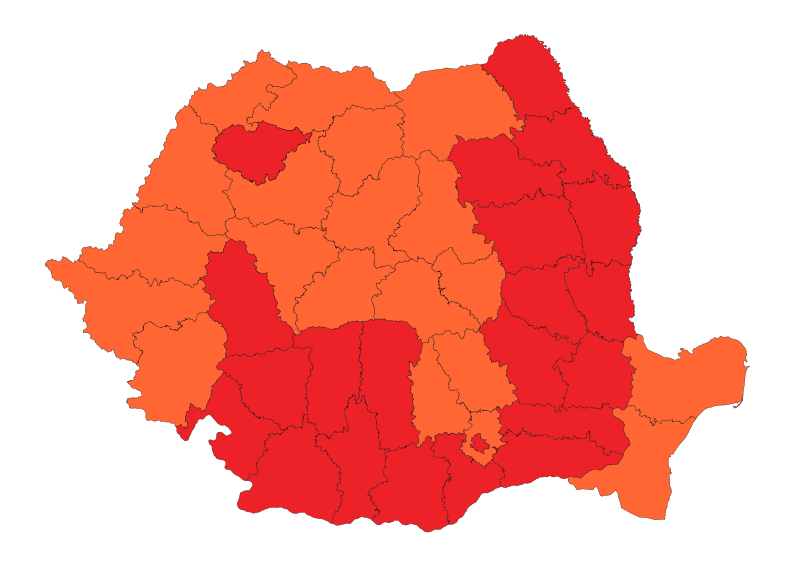

In [19]:
# df_fround["rank"] = df_fround.groupby([location_level, "candidate"]).agg({"value": "sum"}).groupby(level=0)["value"].rank(ascending=False).astype(int)
#df_fround.groupby(location_level)["value"].rank(ascending=False).astype(int)

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
dd = df_runoff.groupby([location_level, "candidate"]).agg({"value": "sum"})
dd["rank"] = dd.groupby(level=0)["value"].rank(ascending=False).astype(int)
dd = dd.reset_index()

data_tmp = dd[dd["rank"] == 1]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")
data_tmp["color"] = data_tmp["candidate"].replace(colors)

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="candidate",
    color=data_tmp["color"],
    edgecolor="black",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
#         shrink=0.3
    )
)

plt.axis("off")

C:\Users\cnavarreteliz\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(19.789276790791067, 30.187919475763074, 43.386705176366725, 48.49771148062704)

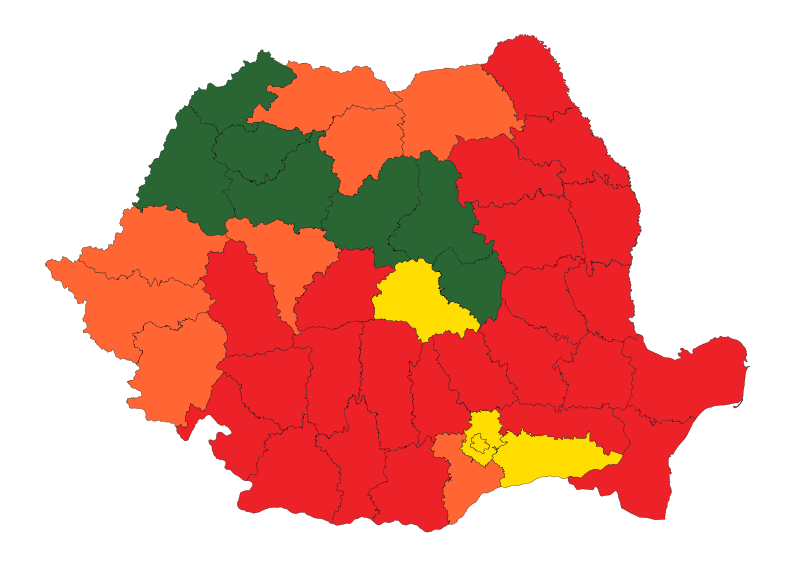

In [12]:
df["rank"] = df.groupby("county_name")["value"].rank(ascending=False).astype(int)

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

data_tmp = df[df["rank"] == 1]
data_tmp = pd.merge(data_tmp, gdf, left_on="county_name", right_on="shapeName")
data_tmp["color"] = data_tmp["candidate"].replace(colors)

data_tmp = gpd.GeoDataFrame(data_tmp)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# data_tmp["value"] = NormalizeData(data_tmp["value"])

data_tmp.plot(
    column="candidate", 
    color=data_tmp["color"],
    edgecolor="black",
    lw=0.2,
    ax=ax, 
    legend=True, 
    legend_kwds=dict(
#         shrink=0.3
    )
)

plt.axis("off")

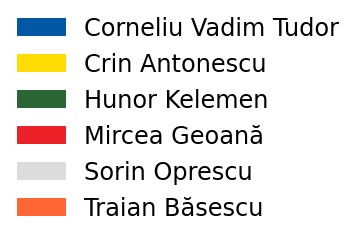

In [20]:
#Imports
import matplotlib.patches as mpatches

# where some data has already been plotted to ax
handles, labels = ax.get_legend_handles_labels()

for key in colors.keys():
    if key in df["candidate"].unique():
        value = colors[key]
        patch = mpatches.Patch(color=value, label=key)
        handles.append(patch) 
        
legend = plt.legend(handles=handles, loc='lower center', fontsize=24, frameon=False, ncol=1)

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # fig.savefig(filename, dpi="figure", bbox_inches=bbox)

plt.axis("off")
# export_legend(legend)
# plt.show()
legend